In [1]:
import pandas as pd 

In [2]:
data=pd.read_csv("preplacement.csv")

In [3]:
data

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed,1,67.00,91.00,58.00,55.0,58.80,270000.0
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed,2,79.33,78.33,77.48,86.5,66.28,200000.0
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed,3,65.00,68.00,64.00,75.0,57.80,250000.0
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed,4,56.00,52.00,52.00,66.0,59.43,265000.0
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,5,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,211,80.60,82.00,77.60,91.0,74.49,400000.0
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed,212,58.00,60.00,72.00,74.0,53.62,275000.0
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed,213,67.00,67.00,73.00,59.0,69.72,295000.0
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed,214,74.00,66.00,58.00,70.0,60.23,204000.0


In [4]:
data.isnull().sum()

gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
dtype: int64

In [5]:
def get_pdf_probability(data,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    sns.distplot(data,kde=True,kde_kws={"color":"blue"},color="green")
    pyplot.axvline(startrange,color="red")
    pyplot.axvline(endrange,color="red")
    # generate a sample
    sample=data
    # calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print("mean=%.3f, standard deviation=%.3f"%(sample_mean,sample_std))
    # define the distribution 
    dist=norm(sample_mean, sample_std)
    # sample probabilites for a range of outcomes
    values=[dist.pdf(value) for value in range(startrange,endrange)]
    #probabilities=[dist.pdf(value)for value in values]
    prob=sum(values)
    print("the area between range ({},{}):{}".format(startrange,endrange,sum(values)))
    return prob

mean=67.303, standard deviation=10.827
the area between range (40,60):0.23035961179550077


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1516\3908310525.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,kde=True,kde_kws={"color":"blue"},color="green")


np.float64(0.23035961179550077)

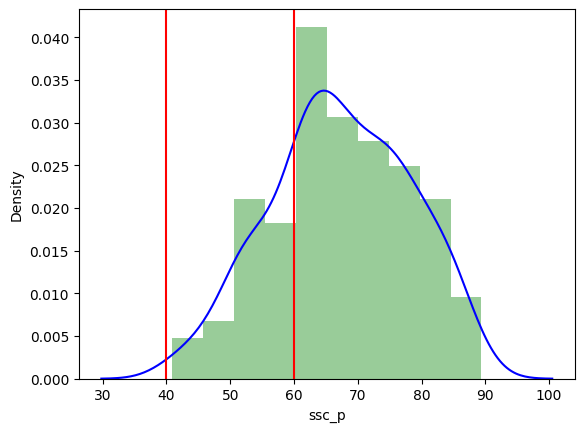

In [6]:
get_pdf_probability(data["ssc_p"],40,60)

CUMULATIVE DENSITY FUNCTION

In [7]:
import statsmodels

In [8]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(data["ssc_p"])
ecdf(55)

np.float64(0.1581395348837209)

STANDARD NORMAL DISTRIBUTION

In [9]:
import numpy as np
import seaborn as sns
def stdgraphy(data) :
        mean=data.mean()
        std=data.std()
        z_score=[((i-mean)/std) for i in data]
        #print(z_score)
        #z_score=[((j-mean)/std) for j in data]
        sns.distplot(z_score,kde=True,kde_kws={"color":"red"},color="yellow") 
        sum(z_score)/len(z_score)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1516\2944388852.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True,kde_kws={"color":"red"},color="yellow")


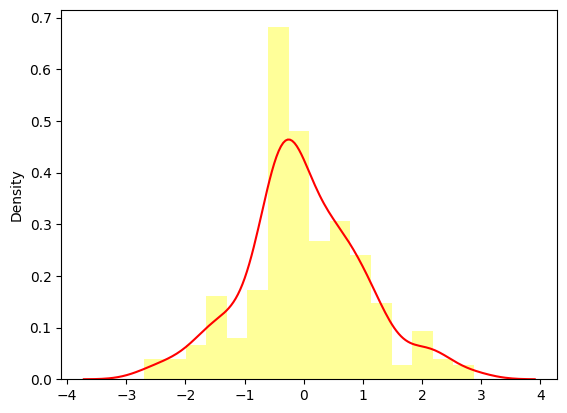

In [10]:
stdgraphy(data["hsc_p"])